# 데이터 불러오기

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tools.eval_measures import mse,rmse
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tools.eval_measures import rmse, aic

import warnings
warnings.filterwarnings("ignore")

from numpy import log

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/팔당댐/combined_data/combined_train_test_filled_cleansed.csv', parse_dates=['ymdhm'])
df

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
0,2012-05-01 00:00:00,24.800,555.00,219.07,24.93,555.00,445.0,310.7,469.05,300.2,0.0,290.0,729.80,275.3,540.18,0.0,0.0,0.0
1,2012-05-01 00:10:00,24.794,464.60,218.86,25.15,562.90,449.0,314.7,498.00,300.2,0.0,290.0,731.48,275.3,540.18,0.0,0.0,0.0
2,2012-05-01 00:20:00,24.789,478.10,218.69,25.31,576.40,451.0,313.7,490.68,301.2,0.0,290.0,726.42,275.3,540.18,0.0,0.0,0.0
3,2012-05-01 00:30:00,24.789,464.80,218.69,25.31,563.10,452.0,311.7,476.21,301.2,0.0,290.0,726.42,276.3,552.17,0.0,0.0,0.0
4,2012-05-01 00:40:00,24.789,478.10,218.69,25.31,576.40,450.0,311.7,476.21,301.2,0.0,291.0,707.17,277.3,564.29,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276331,2022-07-18 23:10:00,25.040,259.23,212.86,31.14,259.23,510.0,288.0,319.84,295.0,0.0,299.0,-456.41,306.0,974.40,0.0,0.0,0.0
276332,2022-07-18 23:20:00,25.040,260.46,212.86,31.14,260.46,492.0,287.0,314.01,303.0,0.0,304.0,-717.30,308.0,1006.88,0.0,0.0,0.0
276333,2022-07-18 23:30:00,25.040,259.37,212.86,31.14,259.37,475.0,299.0,387.55,307.0,0.0,309.0,-843.37,310.0,1039.90,0.0,0.0,0.0
276334,2022-07-18 23:40:00,25.040,259.13,212.86,31.14,259.13,458.0,309.0,454.91,311.0,0.0,314.0,-1023.37,312.0,1073.46,0.0,0.0,0.0


In [ ]:
sub = pd.read_csv('/content/drive/Shareddrives/팔당댐/competition_data/sample_submission.csv',index_col=0)
sub.columns

Index(['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630'], dtype='object')

In [ ]:
df.corr().loc[:,list(sub.columns)]

,wl_1018662,wl_1018680,wl_1018683,wl_1019630
swl,-0.317134,-0.348203,-0.337716,-0.294487
inf,0.882496,0.859963,0.848201,0.792667
sfw,-0.178752,-0.206378,-0.211366,-0.179619
ecpc,0.178754,0.206380,0.211368,0.179621
tototf,0.890549,0.867178,0.855476,0.800157
tide_level,0.010403,0.013483,0.017198,0.073301
wl_1018662,1.000000,0.991275,0.991074,0.950057
fw_1018662,0.961238,0.946692,0.940956,0.890283
wl_1018680,0.991275,1.000000,0.995351,0.958501
fw_1018680,NaN,NaN,NaN,NaN


In [ ]:
#df = df[(df['ymdhm'].dt.month == 5) | (df['ymdhm'].dt.month == 6)|(df['ymdhm'].dt.month==7)]
df = df.set_index('ymdhm')

In [ ]:
df

,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
ymdhm,,,,,,,,,,,,,,,,,
2012-05-01 00:00:00,24.800,555.00,219.07,24.93,555.00,445.0,310.7,469.05,300.2,0.0,290.0,729.80,275.3,540.18,0.0,0.0,0.0
2012-05-01 00:10:00,24.794,464.60,218.86,25.15,562.90,449.0,314.7,498.00,300.2,0.0,290.0,731.48,275.3,540.18,0.0,0.0,0.0
2012-05-01 00:20:00,24.789,478.10,218.69,25.31,576.40,451.0,313.7,490.68,301.2,0.0,290.0,726.42,275.3,540.18,0.0,0.0,0.0
2012-05-01 00:30:00,24.789,464.80,218.69,25.31,563.10,452.0,311.7,476.21,301.2,0.0,290.0,726.42,276.3,552.17,0.0,0.0,0.0
2012-05-01 00:40:00,24.789,478.10,218.69,25.31,576.40,450.0,311.7,476.21,301.2,0.0,291.0,707.17,277.3,564.29,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:10:00,25.040,259.23,212.86,31.14,259.23,510.0,288.0,319.84,295.0,0.0,299.0,-456.41,306.0,974.40,0.0,0.0,0.0
2022-07-18 23:20:00,25.040,260.46,212.86,31.14,260.46,492.0,287.0,314.01,303.0,0.0,304.0,-717.30,308.0,1006.88,0.0,0.0,0.0
2022-07-18 23:30:00,25.040,259.37,212.86,31.14,259.37,475.0,299.0,387.55,307.0,0.0,309.0,-843.37,310.0,1039.90,0.0,0.0,0.0


In [ ]:
df.describe()

,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
count,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.0,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000
mean,25.079251,548.548083,219.425047,24.575537,542.037573,345.631700,329.232797,746.826551,316.071760,0.0,312.590404,600.970021,299.979812,1056.807758,0.034074,0.038265,0.035985
std,0.146126,1110.978412,9.912109,9.911699,1104.317316,174.250734,76.559900,1077.388189,67.495669,0.0,63.883452,1376.848129,51.442783,1428.279212,0.338607,0.370553,0.360769
min,23.993000,-807.500000,176.380000,2.150000,0.000000,39.000000,259.700000,243.290000,246.200000,0.0,247.000000,-3522.710000,241.300000,212.040000,0.000000,0.000000,0.000000
25%,24.980000,127.417500,211.770000,14.670000,132.000000,192.000000,287.700000,319.840000,278.200000,0.0,275.000000,205.082500,267.300000,449.120000,0.000000,0.000000,0.000000
50%,25.100000,249.570000,217.630000,26.370000,174.980000,324.000000,307.000000,441.000000,297.200000,0.0,295.000000,355.980000,286.300000,679.420000,0.000000,0.000000,0.000000
75%,25.190000,530.000000,229.330000,32.230000,505.000000,487.000000,342.700000,725.690000,330.200000,0.0,328.000000,709.710000,316.300000,1142.220000,0.000000,0.000000,0.000000
max,25.449000,25991.500000,241.850000,67.620000,25791.500000,842.000000,1287.700000,9405.640000,1146.200000,0.0,1080.000000,25289.170000,843.300000,29854.120000,24.000000,21.000000,24.000000


In [ ]:
# fw_1018680는 원래 없는 자료이므로 삭제
df.drop(['fw_1018680'], axis=1, inplace=True)

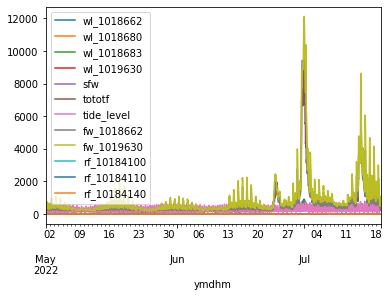

In [ ]:
# 2022년

df.loc['2022',['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630', 
               'sfw', 'tototf', 'tide_level', 'fw_1018662', 'fw_1019630',
               'rf_10184100', 'rf_10184110',	'rf_10184140']].plot();

In [ ]:
# # 상관계수가 높거나, 다른 변수에 의해 도출되는 변수인 swl, inf, ecpc은 최종변수에서 제외
#df1=pd.DataFrame.copy(df)
#df1=df1.drop(['sfw','inf'],axis=1)
#df1

In [ ]:
X = df.drop(list(sub.columns),axis=1)
Y = df.loc[:,list(sub.columns)]

In [ ]:
X

,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,rf_10184100,rf_10184110,rf_10184140
ymdhm,,,,,,,,,,,,
2012-05-01 00:00:00,24.800,555.00,219.07,24.93,555.00,445.0,469.05,729.80,540.18,0.0,0.0,0.0
2012-05-01 00:10:00,24.794,464.60,218.86,25.15,562.90,449.0,498.00,731.48,540.18,0.0,0.0,0.0
2012-05-01 00:20:00,24.789,478.10,218.69,25.31,576.40,451.0,490.68,726.42,540.18,0.0,0.0,0.0
2012-05-01 00:30:00,24.789,464.80,218.69,25.31,563.10,452.0,476.21,726.42,552.17,0.0,0.0,0.0
2012-05-01 00:40:00,24.789,478.10,218.69,25.31,576.40,450.0,476.21,707.17,564.29,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:10:00,25.040,259.23,212.86,31.14,259.23,510.0,319.84,-456.41,974.40,0.0,0.0,0.0
2022-07-18 23:20:00,25.040,260.46,212.86,31.14,260.46,492.0,314.01,-717.30,1006.88,0.0,0.0,0.0
2022-07-18 23:30:00,25.040,259.37,212.86,31.14,259.37,475.0,387.55,-843.37,1039.90,0.0,0.0,0.0


In [ ]:
Y

,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2012-05-01 00:00:00,310.7,300.2,290.0,275.3
2012-05-01 00:10:00,314.7,300.2,290.0,275.3
2012-05-01 00:20:00,313.7,301.2,290.0,275.3
2012-05-01 00:30:00,311.7,301.2,290.0,276.3
2012-05-01 00:40:00,311.7,301.2,291.0,277.3
...,...,...,...,...
2022-07-18 23:10:00,288.0,295.0,299.0,306.0
2022-07-18 23:20:00,287.0,303.0,304.0,308.0
2022-07-18 23:30:00,299.0,307.0,309.0,310.0


# 이상치 제거(XXXXXXXX)

In [ ]:
q3 = df1.quantile(0.75)
q1 = df1.quantile(0.25)
iqr = q3-q1
iqr

NameError: ignored

In [ ]:
def is_outlier(col):
    new_value = []
    x = df1[col]
    for i in x:
        if i > q3[col] + 1.5*iqr[col] or i < q1[col] - 1.5 * iqr[col] or i <= 0:
            new_value.append(np.nan)
        else:
            new_value.append(i)
    return new_value

In [ ]:
df1.columns

Index(['sfw', 'tototf', 'tide_level', 'wl_1018662', 'fw_1018662', 'wl_1018680',
       'wl_1018683', 'fw_1018683', 'wl_1019630', 'fw_1019630', 'rf_10184100',
       'rf_10184110', 'rf_10184140'],
      dtype='object')

In [ ]:
new_sfw = is_outlier('sfw')
new_tototf = is_outlier('tototf')
new_tide_level = is_outlier('tide_level')
new_fw_1018662 = is_outlier('fw_1018662')
new_fw_1018683 = is_outlier('fw_1018683')
new_fw_1019630 = is_outlier('fw_1019630')
new_rf_10184100 = is_outlier('rf_10184100')
new_rf_10184110 = is_outlier('rf_10184110')
new_rf_10184140 = is_outlier('rf_10184140')

In [ ]:
new = np.array([new_sfw,new_tototf,new_tide_level,new_fw_1018662,new_fw_1018683,new_fw_1019630,new_rf_10184100,new_rf_10184110,new_rf_10184140])
new.T.shape

(143856, 9)

In [ ]:
df1

,sfw,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
ymdhm,,,,,,,,,,,,,
2012-05-01 00:00:00,219.07,555.00,445.0,310.7,469.05,300.2,290.0,729.80,275.3,540.18,0.0,0.0,0.0
2012-05-01 00:10:00,218.86,562.90,449.0,314.7,498.00,300.2,290.0,731.48,275.3,540.18,0.0,0.0,0.0
2012-05-01 00:20:00,218.69,576.40,451.0,313.7,490.68,301.2,290.0,726.42,275.3,540.18,0.0,0.0,0.0
2012-05-01 00:30:00,218.69,563.10,452.0,311.7,476.21,301.2,290.0,726.42,276.3,552.17,0.0,0.0,0.0
2012-05-01 00:40:00,218.69,576.40,450.0,311.7,476.21,301.2,291.0,707.17,277.3,564.29,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:10:00,212.86,259.23,510.0,288.0,319.84,295.0,299.0,-456.41,306.0,974.40,0.0,0.0,0.0
2022-07-18 23:20:00,212.86,260.46,492.0,287.0,314.01,303.0,304.0,-717.30,308.0,1006.88,0.0,0.0,0.0
2022-07-18 23:30:00,212.86,259.37,475.0,299.0,387.55,307.0,309.0,-843.37,310.0,1039.90,0.0,0.0,0.0


In [ ]:
df1_copy = df1.copy()
df1_copy.drop(list(sub.columns),axis=1,inplace=True)

In [ ]:
X = pd.DataFrame(new.T,index = df1_copy.index,columns=df1_copy.columns)
X

,sfw,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,rf_10184100,rf_10184110,rf_10184140
ymdhm,,,,,,,,,
2012-05-01 00:00:00,219.07,555.00,445.0,469.05,729.80,540.18,NaN,NaN,NaN
2012-05-01 00:10:00,218.86,562.90,449.0,498.00,731.48,540.18,NaN,NaN,NaN
2012-05-01 00:20:00,218.69,576.40,451.0,490.68,726.42,540.18,NaN,NaN,NaN
2012-05-01 00:30:00,218.69,563.10,452.0,476.21,726.42,552.17,NaN,NaN,NaN
2012-05-01 00:40:00,218.69,576.40,450.0,476.21,707.17,564.29,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-07-18 23:10:00,212.86,259.23,510.0,319.84,NaN,974.40,NaN,NaN,NaN
2022-07-18 23:20:00,212.86,260.46,492.0,314.01,NaN,1006.88,NaN,NaN,NaN
2022-07-18 23:30:00,212.86,259.37,475.0,387.55,NaN,1039.90,NaN,NaN,NaN


In [ ]:
X.isnull().sum()

sfw                 0
tototf          12614
tide_level          0
fw_1018662      13468
fw_1018683      26021
fw_1019630      10805
rf_10184100    143856
rf_10184110    143856
rf_10184140    143856
dtype: int64

In [ ]:
X.interpolate(method='values',inplace=True)

In [ ]:
X.isnull().sum()

sfw                 0
tototf              0
tide_level          0
fw_1018662          0
fw_1018683          0
fw_1019630          0
rf_10184100    143856
rf_10184110    143856
rf_10184140    143856
dtype: int64

In [ ]:
Y = df1[list(sub.columns)]
Y

,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2012-05-01 00:00:00,310.7,300.2,290.0,275.3
2012-05-01 00:10:00,314.7,300.2,290.0,275.3
2012-05-01 00:20:00,313.7,301.2,290.0,275.3
2012-05-01 00:30:00,311.7,301.2,290.0,276.3
2012-05-01 00:40:00,311.7,301.2,291.0,277.3
...,...,...,...,...
2022-07-18 23:10:00,288.0,295.0,299.0,306.0
2022-07-18 23:20:00,287.0,303.0,304.0,308.0
2022-07-18 23:30:00,299.0,307.0,309.0,310.0


In [ ]:
df = pd.concat([X,Y],axis=1)
df

,sfw,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,rf_10184100,rf_10184110,rf_10184140,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,,,,,,,,,
2012-05-01 00:00:00,219.07,555.00,445.0,469.05,729.80,540.18,NaN,NaN,NaN,310.7,300.2,290.0,275.3
2012-05-01 00:10:00,218.86,562.90,449.0,498.00,731.48,540.18,NaN,NaN,NaN,314.7,300.2,290.0,275.3
2012-05-01 00:20:00,218.69,576.40,451.0,490.68,726.42,540.18,NaN,NaN,NaN,313.7,301.2,290.0,275.3
2012-05-01 00:30:00,218.69,563.10,452.0,476.21,726.42,552.17,NaN,NaN,NaN,311.7,301.2,290.0,276.3
2012-05-01 00:40:00,218.69,576.40,450.0,476.21,707.17,564.29,NaN,NaN,NaN,311.7,301.2,291.0,277.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:10:00,212.86,259.23,510.0,319.84,25.27,974.40,NaN,NaN,NaN,288.0,295.0,299.0,306.0
2022-07-18 23:20:00,212.86,260.46,492.0,314.01,25.27,1006.88,NaN,NaN,NaN,287.0,303.0,304.0,308.0
2022-07-18 23:30:00,212.86,259.37,475.0,387.55,25.27,1039.90,NaN,NaN,NaN,299.0,307.0,309.0,310.0


# Scale

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scaler=MinMaxScaler()
# scaled_train=scaler.fit_transform(X[:'2022-05-31 23:50']) # train - fit_transform
# scaled_test=scaler.transform(X['2022-06-01 00:00':]) # test - transform

# df_scaled=pd.DataFrame(data=np.concatenate((scaled_train,scaled_test),axis=0), columns=X.columns, index=df.index)
# df_scaled

In [ ]:
#X_drop = X#.drop(['rf_10184100','rf_10184110','rf_10184140'],axis=1)
#X_drop

# 다시 스케일링

In [ ]:
X.values

array([[ 24.8  , 555.   , 219.07 , ...,   0.   ,   0.   ,   0.   ],
       [ 24.794, 464.6  , 218.86 , ...,   0.   ,   0.   ,   0.   ],
       [ 24.789, 478.1  , 218.69 , ...,   0.   ,   0.   ,   0.   ],
       ...,
       [ 25.04 , 259.37 , 212.86 , ...,   0.   ,   0.   ,   0.   ],
       [ 25.04 , 259.13 , 212.86 , ...,   0.   ,   0.   ,   0.   ],
       [ 25.04 , 258.16 , 212.86 , ...,   0.   ,   0.   ,   0.   ]])

In [ ]:
# from math import log10
# log_values = []
# for i in X_drop.columns:
#     log = []
#     for j in X_drop[i]:
#         try:
#             x = log10(j)
#             log.append(x)
#         except:
#             log.append(j)
#     log_values.append(log)


In [ ]:
x_cols = X.columns
x_cols

Index(['swl', 'inf', 'sfw', 'ecpc', 'tototf', 'tide_level', 'fw_1018662',
       'fw_1018683', 'fw_1019630', 'rf_10184100', 'rf_10184110',
       'rf_10184140'],
      dtype='object')

In [ ]:
for i in range(len(x_cols)):
    X[x_cols[i]] = np.log10(X[x_cols[i]]-min(X[x_cols[i]])+1)

In [ ]:
X.describe()

,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,rf_10184100,rf_10184110,rf_10184140
count,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000
mean,0.318255,3.076651,1.632464,1.318418,2.436666,2.398348,2.212317,3.599806,2.676362,0.007738,0.008562,0.008022
std,0.031447,0.183790,0.101238,0.228825,0.437448,0.305310,0.757392,0.112049,0.450240,0.059375,0.062934,0.061100
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.298198,2.971238,1.560982,1.130977,2.123852,2.187521,1.889582,3.571568,2.376723,0.000000,0.000000,0.000000
50%,0.323665,3.024514,1.625827,1.401745,2.245463,2.456366,2.298220,3.588797,2.670598,0.000000,0.000000,0.000000
75%,0.341830,3.126618,1.731991,1.492481,2.704151,2.652246,2.684307,3.626691,2.969034,0.000000,0.000000,0.000000
max,0.390228,4.428135,1.822626,1.822626,4.411493,2.905256,3.962054,4.459587,4.471923,1.397940,1.342423,1.397940


# 아님(XXXXXXXX)

In [ ]:
#len(log_values)

NameError: ignored

In [ ]:
c = np.array(log_values)
c.shape

(0,)

In [ ]:
c.T

array([], dtype=float64)

In [ ]:
X_log = pd.DataFrame(c.T,index=df.index,columns=X_drop.columns)
X_log.head()

ValueError: ignored

In [ ]:
X_log.describe() 

In [ ]:
X_log[X_log['fw_1019630']==0]

In [ ]:
X_log.isnull().sum()

# 여기부터 다시 이어서

In [ ]:
df = pd.concat([X,Y],axis=1)
df

,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,rf_10184100,rf_10184110,rf_10184140,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,,,,,,,,,,,,
2012-05-01 00:00:00,0.256958,3.134655,1.640382,1.376212,2.745075,2.609594,2.355566,3.628747,2.517381,0.0,0.0,0.0,310.7,300.2,290.0,275.3
2012-05-01 00:10:00,0.255514,3.104863,1.638290,1.380211,2.751202,2.613842,2.407748,3.628919,2.517381,0.0,0.0,0.0,314.7,300.2,290.0,275.3
2012-05-01 00:20:00,0.254306,3.109444,1.636588,1.383097,2.761477,2.615950,2.395134,3.628402,2.517381,0.0,0.0,0.0,313.7,301.2,290.0,275.3
2012-05-01 00:30:00,0.254306,3.104931,1.636588,1.383097,2.751356,2.617000,2.369067,3.628402,2.532920,0.0,0.0,0.0,311.7,301.2,290.0,276.3
2012-05-01 00:40:00,0.254306,3.109444,1.636588,1.383097,2.761477,2.614897,2.369067,3.626431,2.548082,0.0,0.0,0.0,311.7,301.2,291.0,277.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:10:00,0.311118,3.028461,1.573800,1.476976,2.415357,2.673942,1.889582,3.486756,2.882729,0.0,0.0,0.0,288.0,295.0,299.0,306.0
2022-07-18 23:20:00,0.311118,3.028961,1.573800,1.476976,2.417405,2.657056,1.855640,3.448151,2.900826,0.0,0.0,0.0,287.0,303.0,304.0,308.0
2022-07-18 23:30:00,0.311118,3.028518,1.573800,1.476976,2.415591,2.640481,2.162146,3.428190,2.918481,0.0,0.0,0.0,299.0,307.0,309.0,310.0


In [ ]:
df_train=df.loc[:'2022-05-31 23:50:00']
df_test=df.loc['2022-06-01 00:00:00':]
df_train

,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,rf_10184100,rf_10184110,rf_10184140,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,,,,,,,,,,,,
2012-05-01 00:00:00,0.256958,3.134655,1.640382,1.376212,2.745075,2.609594,2.355566,3.628747,2.517381,0.0,0.0,0.0,310.7,300.2,290.0,275.3
2012-05-01 00:10:00,0.255514,3.104863,1.638290,1.380211,2.751202,2.613842,2.407748,3.628919,2.517381,0.0,0.0,0.0,314.7,300.2,290.0,275.3
2012-05-01 00:20:00,0.254306,3.109444,1.636588,1.383097,2.761477,2.615950,2.395134,3.628402,2.517381,0.0,0.0,0.0,313.7,301.2,290.0,275.3
2012-05-01 00:30:00,0.254306,3.104931,1.636588,1.383097,2.751356,2.617000,2.369067,3.628402,2.532920,0.0,0.0,0.0,311.7,301.2,290.0,276.3
2012-05-01 00:40:00,0.254306,3.109444,1.636588,1.383097,2.761477,2.614897,2.369067,3.626431,2.548082,0.0,0.0,0.0,311.7,301.2,291.0,277.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31 23:10:00,0.339849,2.977468,1.629512,1.395501,2.152105,2.260071,1.637790,3.612708,2.451080,0.0,0.0,0.0,281.7,281.2,278.0,271.3
2022-05-31 23:20:00,0.339849,2.977527,1.629512,1.395501,2.152502,2.230449,1.511750,3.604739,2.468333,0.0,0.0,0.0,279.7,279.2,278.0,272.3
2022-05-31 23:30:00,0.339849,2.977500,1.629512,1.395501,2.152319,2.198657,1.433130,3.596553,2.468333,0.0,0.0,0.0,278.7,277.2,277.0,272.3


In [ ]:
df_test

,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,rf_10184100,rf_10184110,rf_10184140,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,,,,,,,,,,,,
2022-06-01 00:00:00,0.341830,2.977312,1.633266,1.388989,2.151063,2.093422,1.433130,3.548013,2.415040,0.0,0.0,0.0,279.0,276.0,274.0,269.0
2022-06-01 00:10:00,0.341830,2.977394,1.633266,1.388989,2.151615,2.053078,1.578983,3.550538,2.376723,0.0,0.0,0.0,281.0,277.0,274.0,267.0
2022-06-01 00:20:00,0.343802,3.194348,1.636989,1.382377,2.151982,2.012837,1.737034,3.548520,2.314141,0.0,0.0,0.0,284.0,277.0,274.0,264.0
2022-06-01 00:30:00,0.341830,2.907680,1.633266,1.388989,2.152105,1.963788,1.779885,3.553547,2.244005,0.0,0.0,0.0,285.0,277.0,274.0,261.0
2022-06-01 00:40:00,0.341830,2.977326,1.633266,1.388989,2.151155,1.913814,1.737034,3.559996,2.191898,0.0,0.0,0.0,284.0,278.0,274.0,259.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:10:00,0.311118,3.028461,1.573800,1.476976,2.415357,2.673942,1.889582,3.486756,2.882729,0.0,0.0,0.0,288.0,295.0,299.0,306.0
2022-07-18 23:20:00,0.311118,3.028961,1.573800,1.476976,2.417405,2.657056,1.855640,3.448151,2.900826,0.0,0.0,0.0,287.0,303.0,304.0,308.0
2022-07-18 23:30:00,0.311118,3.028518,1.573800,1.476976,2.415591,2.640481,2.162146,3.428190,2.918481,0.0,0.0,0.0,299.0,307.0,309.0,310.0


In [ ]:
df_forecast=pd.DataFrame.copy(df.loc['2022'])
df_forecast

,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,rf_10184100,rf_10184110,rf_10184140,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,,,,,,,,,,,,
2022-05-01 00:00:00,0.343802,3.189732,1.636989,1.382377,2.098159,1.633468,1.979321,3.547000,2.415040,0.0,0.0,0.0,290.7,284.2,279.0,269.3
2022-05-01 00:10:00,0.343802,2.969872,1.636989,1.382377,2.098575,1.531479,2.006038,3.564530,2.356580,0.0,0.0,0.0,291.7,284.2,279.0,266.3
2022-05-01 00:20:00,0.343802,2.969742,1.636989,1.382377,2.097604,1.414973,1.979321,3.574717,2.314141,0.0,0.0,0.0,290.7,284.2,279.0,264.3
2022-05-01 00:30:00,0.343802,2.969812,1.636989,1.382377,2.098124,1.301030,1.951143,3.582793,2.291702,0.0,0.0,0.0,289.7,284.2,279.0,263.3
2022-05-01 00:40:00,0.341830,2.907680,1.633266,1.388989,2.098367,1.301030,1.889582,3.587008,2.314141,0.0,0.0,0.0,287.7,284.2,279.0,264.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:10:00,0.311118,3.028461,1.573800,1.476976,2.415357,2.673942,1.889582,3.486756,2.882729,0.0,0.0,0.0,288.0,295.0,299.0,306.0
2022-07-18 23:20:00,0.311118,3.028961,1.573800,1.476976,2.417405,2.657056,1.855640,3.448151,2.900826,0.0,0.0,0.0,287.0,303.0,304.0,308.0
2022-07-18 23:30:00,0.311118,3.028518,1.573800,1.476976,2.415591,2.640481,2.162146,3.428190,2.918481,0.0,0.0,0.0,299.0,307.0,309.0,310.0


In [ ]:
df_tt = pd.concat([df_train.loc['2022'],df_test.loc['2022']],axis=0)
df_tt

,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,rf_10184100,rf_10184110,rf_10184140,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,,,,,,,,,,,,
2022-05-01 00:00:00,0.343802,3.189732,1.636989,1.382377,2.098159,1.633468,1.979321,3.547000,2.415040,0.0,0.0,0.0,290.7,284.2,279.0,269.3
2022-05-01 00:10:00,0.343802,2.969872,1.636989,1.382377,2.098575,1.531479,2.006038,3.564530,2.356580,0.0,0.0,0.0,291.7,284.2,279.0,266.3
2022-05-01 00:20:00,0.343802,2.969742,1.636989,1.382377,2.097604,1.414973,1.979321,3.574717,2.314141,0.0,0.0,0.0,290.7,284.2,279.0,264.3
2022-05-01 00:30:00,0.343802,2.969812,1.636989,1.382377,2.098124,1.301030,1.951143,3.582793,2.291702,0.0,0.0,0.0,289.7,284.2,279.0,263.3
2022-05-01 00:40:00,0.341830,2.907680,1.633266,1.388989,2.098367,1.301030,1.889582,3.587008,2.314141,0.0,0.0,0.0,287.7,284.2,279.0,264.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:10:00,0.311118,3.028461,1.573800,1.476976,2.415357,2.673942,1.889582,3.486756,2.882729,0.0,0.0,0.0,288.0,295.0,299.0,306.0
2022-07-18 23:20:00,0.311118,3.028961,1.573800,1.476976,2.417405,2.657056,1.855640,3.448151,2.900826,0.0,0.0,0.0,287.0,303.0,304.0,308.0
2022-07-18 23:30:00,0.311118,3.028518,1.573800,1.476976,2.415591,2.640481,2.162146,3.428190,2.918481,0.0,0.0,0.0,299.0,307.0,309.0,310.0


# 모델 학습

In [ ]:
# 모델 학습
lag=160
model=VAR(df_train) 
fitted_model=model.fit(lag)

for i in range(6912):
  # df_tt에서 예측하려는 시간 직전 lag()개 데이터 가져오기
  forecast_input=df_tt.iloc[:4464+i,:].values[-lag:] # 4463행(2022-05-31 23:50:00)

  # 바로 다음 step 1개 예측
  fc=fitted_model.forecast(y=forecast_input, steps=1)

  # df_forecast에 예측한 wl 결과값 추가하기
  wl_names=['wl_1018662','wl_1018680','wl_1018683','wl_1019630']
  for name in wl_names:
    col=list(df_forecast.columns).index(name)
    df_forecast.iloc[4464+i,col]=fc[0][col]

In [ ]:
df_forecast.loc['2022-06-01 00:00:00':,['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']].to_csv('/content/drive/Shareddrives/팔당댐/제출/var_log_0902_160.csv')

In [ ]:
df_tt.loc['2022-06-01 00:00:00':,['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]

,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00:00,279.0,276.0,274.0,269.0
2022-06-01 00:10:00,281.0,277.0,274.0,267.0
2022-06-01 00:20:00,284.0,277.0,274.0,264.0
2022-06-01 00:30:00,285.0,277.0,274.0,261.0
2022-06-01 00:40:00,284.0,278.0,274.0,259.0
...,...,...,...,...
2022-07-18 23:10:00,288.0,295.0,299.0,306.0
2022-07-18 23:20:00,287.0,303.0,304.0,308.0
2022-07-18 23:30:00,299.0,307.0,309.0,310.0


In [ ]:
from sklearn.metrics import r2_score
def get_r2_score(pred,label):
    r2_list = []
    for i in range(4):
        p = pred[:,i]
        l = label[:,i]
        r2_s = r2_score(l,p)
        r2_list.append(r2_s) 
    
    return np.mean(r2_list)

In [ ]:
# 예측한 데이터
submission=df_forecast.loc['2022-06-01 00:00:00':,['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']].values
submission

# 정답 데이터
tt_np=df_tt.loc['2022-06-01 00:00:00':,['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']].values
tt_np

# # RMSE
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(tt_np, submission)**0.5
print('RMSE score :',rmse)
print('R2 score : ',get_r2_score(submission,tt_np))

RMSE score : 1.1922611297015389
R2 score :  0.9997506568767888


In [ ]:
rmse/get_r2_score(submission,tt_np)

1.19255848595904

In [ ]:
submission

array([[280.07667892, 277.29902612, 274.82943828, 269.29656505],
       [280.91062172, 276.0603719 , 273.46800467, 267.78012102],
       [282.87778449, 276.700463  , 273.28216231, 264.75331209],
       ...,
       [295.85668796, 307.10558456, 307.78655935, 310.17035498],
       [310.40726311, 311.65056506, 312.5925847 , 311.73344156],
       [321.59228813, 316.27403389, 316.84155687, 311.99598583]])

In [ ]:
submission=df_forecast[['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]
submission.reset_index(drop=False, inplace=True)
submission['ymdhm']=submission['ymdhm'].dt.strftime('%Y-%m-%d %H:%M')
submission.set_index('ymdhm', inplace=True)

In [ ]:
submission.to_csv('/content/drive/Shareddrives/팔당댐/제출/var(160)_logScaled.csv')

In [ ]:
lag -> rmse
120 -> 1.242
160 -> 1.222   이게 젤 좋음!!!
180 -> 1.227

SyntaxError: ignored

# 변수별(XXXXXXXXX)

In [ ]:
sub.columns

Index(['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630'], dtype='object')

In [ ]:
# 모델 학습
lag=8
model=VAR(df_train) 
fitted_model=model.fit(lag)

for i in range(6912):
  # df_tt에서 예측하려는 시간 직전 lag(17)개 데이터 가져오기
  forecast_input=df_tt.iloc[:4464+i,:].values[-lag:] # 4463행(2022-05-31 23:50:00)

  # 바로 다음 step 1개 예측
  fc=fitted_model.forecast(y=forecast_input, steps=1)

  # df_forecast에 예측한 wl 결과값 추가하기
  wl_names=['wl_1018662','wl_1018680','wl_1018683','wl_1019630']
  for name in wl_names:
    col=list(df_forecast.columns).index(name)
    df_forecast.iloc[4464+i,col]=fc[0][col]

## sfw

In [ ]:
df_forecast=pd.DataFrame.copy(df.loc['2022'])
df_forecast_temp = df_forecast.loc[:,['sfw','wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]
df_forecast_temp

,sfw,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,
2022-05-01 00:00:00,2.339908,2.463445,2.453624,2.445604,2.430236
2022-05-01 00:10:00,2.339908,2.464936,2.453624,2.445604,2.425371
2022-05-01 00:20:00,2.339908,2.463445,2.453624,2.445604,2.422097
2022-05-01 00:30:00,2.339908,2.461948,2.453624,2.445604,2.420451
2022-05-01 00:40:00,2.339173,2.458940,2.453624,2.445604,2.422097
...,...,...,...,...,...
2022-07-18 23:10:00,2.328094,2.459392,2.469822,2.475671,2.485721
2022-07-18 23:20:00,2.328094,2.457882,2.481443,2.482874,2.488551
2022-07-18 23:30:00,2.328094,2.475671,2.487138,2.489958,2.491362


In [ ]:
df_tt_temp = df_tt.loc[:,['sfw','wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]
df_tt_temp

,sfw,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,
2022-05-01 00:00:00,2.339908,2.463445,2.453624,2.445604,2.430236
2022-05-01 00:10:00,2.339908,2.464936,2.453624,2.445604,2.425371
2022-05-01 00:20:00,2.339908,2.463445,2.453624,2.445604,2.422097
2022-05-01 00:30:00,2.339908,2.461948,2.453624,2.445604,2.420451
2022-05-01 00:40:00,2.339173,2.458940,2.453624,2.445604,2.422097
...,...,...,...,...,...
2022-07-18 23:10:00,2.328094,2.459392,2.469822,2.475671,2.485721
2022-07-18 23:20:00,2.328094,2.457882,2.481443,2.482874,2.488551
2022-07-18 23:30:00,2.328094,2.475671,2.487138,2.489958,2.491362


In [ ]:
df_train_temp = df_train.loc[:,['sfw','wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]
df_train_temp

,sfw,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,
2012-05-01 00:00:00,2.340583,2.492341,2.477411,2.462398,2.439806
2012-05-01 00:10:00,2.340166,2.497897,2.477411,2.462398,2.439806
2012-05-01 00:20:00,2.339829,2.496515,2.478855,2.462398,2.439806
2012-05-01 00:30:00,2.339829,2.493737,2.478855,2.462398,2.441381
2012-05-01 00:40:00,2.339829,2.493737,2.478855,2.463893,2.442950
...,...,...,...,...,...
2022-05-31 23:10:00,2.338437,2.449787,2.449015,2.444045,2.433450
2022-05-31 23:20:00,2.338437,2.446692,2.445915,2.444045,2.435048
2022-05-31 23:30:00,2.338437,2.445137,2.442793,2.442480,2.435048


In [ ]:
# 모델 학습
lag=8
model=VAR(df_train_temp) 
fitted_model=model.fit(lag)

for i in range(6912):
  # df_tt에서 예측하려는 시간 직전 lag(17)개 데이터 가져오기
  forecast_input=df_tt_temp.iloc[:4464+i,:].values[-lag:] # 4463행(2022-05-31 23:50:00)

  # 바로 다음 step 1개 예측
  fc=fitted_model.forecast(y=forecast_input, steps=1)

  # df_forecast에 예측한 wl 결과값 추가하기
  wl_names=['wl_1018662','wl_1018680','wl_1018683','wl_1019630']
  for name in wl_names:
    col=list(df_forecast_temp.columns).index(name)
    df_forecast_temp.iloc[4464+i,col]=fc[0][col]

In [ ]:
df

In [ ]:
# 예측한 데이터
df_forecast_inv=df_forecast.apply(lambda x:10**x)
df_submission=pd.DataFrame(df_forecast_inv, columns=df_forecast.columns, index=df_forecast.index)
df_submission=df_submission.loc['2022-06-01 00:00:00':,['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]
submission_inv_np=df_submission.values
submission_inv_np

# 정답 데이터
tt_inv=df_tt.apply(lambda x:10**x)
df_tt_inv=pd.DataFrame(tt_inv, columns=df_tt.columns, index=df_tt.index)
df_tt_inv=df_tt_inv.loc['2022-06-01 00:00:00':,['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]
tt_inv_np=df_tt_inv.values
tt_inv_np

# # RMSE
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(tt_inv_np, submission_inv_np)**0.5
print('RMSE score :',rmse)
print('R2 score : ',get_r2_score(submission_inv_np,tt_inv_np))

RMSE score : 1.3046560652333286
R2 score :  0.9996961655825214


In [ ]:
submission

,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00:00,2.445604,2.440909,2.437751,2.429752
2022-06-01 00:10:00,2.448706,2.442480,2.437751,2.426511
2022-06-01 00:20:00,2.453318,2.442480,2.437751,2.421604
2022-06-01 00:30:00,2.454845,2.442480,2.437751,2.416641
2022-06-01 00:40:00,2.453318,2.444045,2.437751,2.413300
...,...,...,...,...
2022-07-18 23:10:00,2.459392,2.469822,2.475671,2.485721
2022-07-18 23:20:00,2.457882,2.481443,2.482874,2.488551
2022-07-18 23:30:00,2.475671,2.487138,2.489958,2.491362


In [ ]:
# 예측한 데이터
df_forecast_inv=df_forecast_temp.apply(lambda x:10**x)
df_submission=pd.DataFrame(df_forecast_inv, columns=df_forecast.columns, index=df_forecast.index)
df_submission=df_submission.loc['2022-06-01 00:00:00':,['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]
submission_inv_np=df_submission.values
submission_inv_np

# 정답 데이터
tt_inv=df_tt_temp.apply(lambda x:10**x)
df_tt_inv=pd.DataFrame(tt_inv, columns=df_tt.columns, index=df_tt.index)
df_tt_inv=df_tt_inv.loc['2022-06-01 00:00:00':,['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]
tt_inv_np=df_tt_inv.values
tt_inv_np

# # RMSE
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(tt_inv_np, submission_inv_np)**0.5
print('RMSE score :',rmse)
print('R2 score : ',get_r2_score(submission_inv_np,tt_inv_np))

RMSE score : 1.3401049837080778
R2 score :  0.9996811870712347


## tototf

In [ ]:
df_forecast.head()

,sfw,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,rf_10184100,rf_10184110,rf_10184140,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,,,,,,,,,
2022-05-01 00:00:00,2.339908,2.094681,1.908485,2.528454,2.161795,2.673095,0.0,0.0,0.0,2.463445,2.453624,2.445604,2.430236
2022-05-01 00:10:00,2.339908,2.095100,1.857332,2.536167,2.161787,2.641801,0.0,0.0,0.0,2.464936,2.453624,2.445604,2.425371
2022-05-01 00:20:00,2.339908,2.094122,1.806180,2.528454,2.365900,2.620313,0.0,0.0,0.0,2.463445,2.453624,2.445604,2.422097
2022-05-01 00:30:00,2.339908,2.094646,1.763428,2.520680,2.481027,2.609370,0.0,0.0,0.0,2.461948,2.453624,2.445604,2.420451
2022-05-01 00:40:00,2.339173,2.094890,1.763428,2.504933,2.531517,2.620313,0.0,0.0,0.0,2.458940,2.453624,2.445604,2.422097


In [ ]:
df_forecast=pd.DataFrame.copy(df.loc['2022'])
df_forecast_temp = df_forecast.loc[:,['tototf','wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]
df_forecast_temp

,tototf,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,
2022-05-01 00:00:00,2.094681,2.463445,2.453624,2.445604,2.430236
2022-05-01 00:10:00,2.095100,2.464936,2.453624,2.445604,2.425371
2022-05-01 00:20:00,2.094122,2.463445,2.453624,2.445604,2.422097
2022-05-01 00:30:00,2.094646,2.461948,2.453624,2.445604,2.420451
2022-05-01 00:40:00,2.094890,2.458940,2.453624,2.445604,2.422097
...,...,...,...,...,...
2022-07-18 23:10:00,2.413685,2.459392,2.469822,2.475671,2.485721
2022-07-18 23:20:00,2.415741,2.457882,2.481443,2.482874,2.488551
2022-07-18 23:30:00,2.413920,2.475671,2.487138,2.489958,2.491362


In [ ]:
df_tt_temp = df_tt.loc[:,['tototf','wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]
df_tt_temp

,tototf,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,
2022-05-01 00:00:00,2.094681,2.463445,2.453624,2.445604,2.430236
2022-05-01 00:10:00,2.095100,2.464936,2.453624,2.445604,2.425371
2022-05-01 00:20:00,2.094122,2.463445,2.453624,2.445604,2.422097
2022-05-01 00:30:00,2.094646,2.461948,2.453624,2.445604,2.420451
2022-05-01 00:40:00,2.094890,2.458940,2.453624,2.445604,2.422097
...,...,...,...,...,...
2022-07-18 23:10:00,2.413685,2.459392,2.469822,2.475671,2.485721
2022-07-18 23:20:00,2.415741,2.457882,2.481443,2.482874,2.488551
2022-07-18 23:30:00,2.413920,2.475671,2.487138,2.489958,2.491362


In [ ]:
df_train_temp = df_train.loc[:,['tototf','wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]
df_train_temp

,tototf,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,
2012-05-01 00:00:00,2.744293,2.492341,2.477411,2.462398,2.439806
2012-05-01 00:10:00,2.750431,2.497897,2.477411,2.462398,2.439806
2012-05-01 00:20:00,2.760724,2.496515,2.478855,2.462398,2.439806
2012-05-01 00:30:00,2.750586,2.493737,2.478855,2.462398,2.441381
2012-05-01 00:40:00,2.760724,2.493737,2.478855,2.463893,2.442950
...,...,...,...,...,...
2022-05-31 23:10:00,2.149034,2.449787,2.449015,2.444045,2.433450
2022-05-31 23:20:00,2.149435,2.446692,2.445915,2.444045,2.435048
2022-05-31 23:30:00,2.149250,2.445137,2.442793,2.442480,2.435048


In [ ]:
# 모델 학습
lag=8
model=VAR(df_train_temp) 
fitted_model=model.fit(lag)

for i in range(6912):
  # df_tt에서 예측하려는 시간 직전 lag(17)개 데이터 가져오기
  forecast_input=df_tt_temp.iloc[:4464+i,:].values[-lag:] # 4463행(2022-05-31 23:50:00)

  # 바로 다음 step 1개 예측
  fc=fitted_model.forecast(y=forecast_input, steps=1)

  # df_forecast에 예측한 wl 결과값 추가하기
  wl_names=['wl_1018662','wl_1018680','wl_1018683','wl_1019630']
  for name in wl_names:
    col=list(df_forecast_temp.columns).index(name)
    df_forecast_temp.iloc[4464+i,col]=fc[0][col]

In [ ]:
# 예측한 데이터
submission=df_forecast.loc['2022-06-01 00:00:00':,['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]
submission_np=submission.values

# 정답 데이터
df_answer_test=df_tt.loc['2022-06-01 00:00:00':,['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]
df_answer_test_np=df_answer_test.values

# RMSE
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(df_answer_test_np, submission_np)**0.5
print('RMSE score :',rmse)

RMSE score : 0.0


In [ ]:
# 예측한 데이터
df_forecast_inv=df_forecast_temp.apply(lambda x:10**x)
df_submission=pd.DataFrame(df_forecast_inv, columns=df_forecast.columns, index=df_forecast.index)
df_submission=df_submission.loc['2022-06-01 00:00:00':,['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]
submission_inv_np=df_submission.values
submission_inv_np

# 정답 데이터
tt_inv=df_tt_temp.apply(lambda x:10**x)
df_tt_inv=pd.DataFrame(tt_inv, columns=df_tt.columns, index=df_tt.index)
df_tt_inv=df_tt_inv.loc['2022-06-01 00:00:00':,['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]
tt_inv_np=df_tt_inv.values
tt_inv_np

# # RMSE
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(tt_inv_np, submission_inv_np)**0.5
print('RMSE score :',rmse)
print('R2 score : ',get_r2_score(submission_inv_np,tt_inv_np))

RMSE score : 1.3556885750416559
R2 score :  0.9996745262274762


## tide_level

In [ ]:
df_forecast.head()

,sfw,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,rf_10184100,rf_10184110,rf_10184140,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,,,,,,,,,
2022-05-01 00:00:00,2.339908,2.094681,1.908485,2.528454,2.161795,2.673095,0.0,0.0,0.0,2.463445,2.453624,2.445604,2.430236
2022-05-01 00:10:00,2.339908,2.095100,1.857332,2.536167,2.161787,2.641801,0.0,0.0,0.0,2.464936,2.453624,2.445604,2.425371
2022-05-01 00:20:00,2.339908,2.094122,1.806180,2.528454,2.365900,2.620313,0.0,0.0,0.0,2.463445,2.453624,2.445604,2.422097
2022-05-01 00:30:00,2.339908,2.094646,1.763428,2.520680,2.481027,2.609370,0.0,0.0,0.0,2.461948,2.453624,2.445604,2.420451
2022-05-01 00:40:00,2.339173,2.094890,1.763428,2.504933,2.531517,2.620313,0.0,0.0,0.0,2.458940,2.453624,2.445604,2.422097


In [ ]:
df_forecast=pd.DataFrame.copy(df.loc['2022'])
df_forecast_temp = df_forecast.loc[:,['tide_level','wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]
df_forecast_temp

,tide_level,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,
2022-05-01 00:00:00,1.908485,2.463445,2.453624,2.445604,2.430236
2022-05-01 00:10:00,1.857332,2.464936,2.453624,2.445604,2.425371
2022-05-01 00:20:00,1.806180,2.463445,2.453624,2.445604,2.422097
2022-05-01 00:30:00,1.763428,2.461948,2.453624,2.445604,2.420451
2022-05-01 00:40:00,1.763428,2.458940,2.453624,2.445604,2.422097
...,...,...,...,...,...
2022-07-18 23:10:00,2.707570,2.459392,2.469822,2.475671,2.485721
2022-07-18 23:20:00,2.691965,2.457882,2.481443,2.482874,2.488551
2022-07-18 23:30:00,2.676694,2.475671,2.487138,2.489958,2.491362


In [ ]:
df_tt_temp = df_tt.loc[:,['tide_level','wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]
df_tt_temp

,tide_level,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,
2022-05-01 00:00:00,1.908485,2.463445,2.453624,2.445604,2.430236
2022-05-01 00:10:00,1.857332,2.464936,2.453624,2.445604,2.425371
2022-05-01 00:20:00,1.806180,2.463445,2.453624,2.445604,2.422097
2022-05-01 00:30:00,1.763428,2.461948,2.453624,2.445604,2.420451
2022-05-01 00:40:00,1.763428,2.458940,2.453624,2.445604,2.422097
...,...,...,...,...,...
2022-07-18 23:10:00,2.707570,2.459392,2.469822,2.475671,2.485721
2022-07-18 23:20:00,2.691965,2.457882,2.481443,2.482874,2.488551
2022-07-18 23:30:00,2.676694,2.475671,2.487138,2.489958,2.491362


In [ ]:
df_train_temp = df_train.loc[:,['tide_level','wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]
df_train_temp

,tide_level,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,
2012-05-01 00:00:00,2.648360,2.492341,2.477411,2.462398,2.439806
2012-05-01 00:10:00,2.652246,2.497897,2.477411,2.462398,2.439806
2012-05-01 00:20:00,2.654177,2.496515,2.478855,2.462398,2.439806
2012-05-01 00:30:00,2.655138,2.493737,2.478855,2.462398,2.441381
2012-05-01 00:40:00,2.653213,2.493737,2.478855,2.463893,2.442950
...,...,...,...,...,...
2022-05-31 23:10:00,2.342423,2.449787,2.449015,2.444045,2.433450
2022-05-31 23:20:00,2.318063,2.446692,2.445915,2.444045,2.435048
2022-05-31 23:30:00,2.292256,2.445137,2.442793,2.442480,2.435048


In [ ]:
# 모델 학습
lag=8
model=VAR(df_train_temp) 
fitted_model=model.fit(lag)

for i in range(6912):
  # df_tt에서 예측하려는 시간 직전 lag(17)개 데이터 가져오기
  forecast_input=df_tt_temp.iloc[:4464+i,:].values[-lag:] # 4463행(2022-05-31 23:50:00)

  # 바로 다음 step 1개 예측
  fc=fitted_model.forecast(y=forecast_input, steps=1)

  # df_forecast에 예측한 wl 결과값 추가하기
  wl_names=['wl_1018662','wl_1018680','wl_1018683','wl_1019630']
  for name in wl_names:
    col=list(df_forecast_temp.columns).index(name)
    df_forecast_temp.iloc[4464+i,col]=fc[0][col]

In [ ]:
# 예측한 데이터
df_forecast_inv=df_forecast_temp.apply(lambda x:10**x)
df_submission=pd.DataFrame(df_forecast_inv, columns=df_forecast.columns, index=df_forecast.index)
df_submission=df_submission.loc['2022-06-01 00:00:00':,['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]
submission_inv_np=df_submission.values
submission_inv_np

# 정답 데이터
tt_inv=df_tt_temp.apply(lambda x:10**x)
df_tt_inv=pd.DataFrame(tt_inv, columns=df_tt.columns, index=df_tt.index)
df_tt_inv=df_tt_inv.loc['2022-06-01 00:00:00':,['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]
tt_inv_np=df_tt_inv.values
tt_inv_np

# # RMSE
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(tt_inv_np, submission_inv_np)**0.5
print('RMSE score :',rmse)
print('R2 score : ',get_r2_score(submission_inv_np,tt_inv_np))

RMSE score : 1.3459751804644469
R2 score :  0.9996783887930007


## fw_1018662

In [ ]:
df_forecast.head()

,sfw,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,rf_10184100,rf_10184110,rf_10184140,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,,,,,,,,,
2022-05-01 00:00:00,2.339908,2.094681,1.908485,2.528454,2.161795,2.673095,0.0,0.0,0.0,2.463445,2.453624,2.445604,2.430236
2022-05-01 00:10:00,2.339908,2.095100,1.857332,2.536167,2.161787,2.641801,0.0,0.0,0.0,2.464936,2.453624,2.445604,2.425371
2022-05-01 00:20:00,2.339908,2.094122,1.806180,2.528454,2.365900,2.620313,0.0,0.0,0.0,2.463445,2.453624,2.445604,2.422097
2022-05-01 00:30:00,2.339908,2.094646,1.763428,2.520680,2.481027,2.609370,0.0,0.0,0.0,2.461948,2.453624,2.445604,2.420451
2022-05-01 00:40:00,2.339173,2.094890,1.763428,2.504933,2.531517,2.620313,0.0,0.0,0.0,2.458940,2.453624,2.445604,2.422097


In [ ]:
df_forecast=pd.DataFrame.copy(df.loc['2022'])
df_forecast_temp = df_forecast.loc[:,['fw_1018662','wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]
df_forecast_temp

,fw_1018662,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,
2022-05-01 00:00:00,2.528454,2.463445,2.453624,2.445604,2.430236
2022-05-01 00:10:00,2.536167,2.464936,2.453624,2.445604,2.425371
2022-05-01 00:20:00,2.528454,2.463445,2.453624,2.445604,2.422097
2022-05-01 00:30:00,2.520680,2.461948,2.453624,2.445604,2.420451
2022-05-01 00:40:00,2.504933,2.458940,2.453624,2.445604,2.422097
...,...,...,...,...,...
2022-07-18 23:10:00,2.504933,2.459392,2.469822,2.475671,2.485721
2022-07-18 23:20:00,2.496943,2.457882,2.481443,2.482874,2.488551
2022-07-18 23:30:00,2.588328,2.475671,2.487138,2.489958,2.491362


In [ ]:
df_tt_temp = df_tt.loc[:,['fw_1018662','wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]
df_tt_temp

,fw_1018662,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,
2022-05-01 00:00:00,2.528454,2.463445,2.453624,2.445604,2.430236
2022-05-01 00:10:00,2.536167,2.464936,2.453624,2.445604,2.425371
2022-05-01 00:20:00,2.528454,2.463445,2.453624,2.445604,2.422097
2022-05-01 00:30:00,2.520680,2.461948,2.453624,2.445604,2.420451
2022-05-01 00:40:00,2.504933,2.458940,2.453624,2.445604,2.422097
...,...,...,...,...,...
2022-07-18 23:10:00,2.504933,2.459392,2.469822,2.475671,2.485721
2022-07-18 23:20:00,2.496943,2.457882,2.481443,2.482874,2.488551
2022-07-18 23:30:00,2.588328,2.475671,2.487138,2.489958,2.491362


In [ ]:
df_train_temp = df_train.loc[:,['fw_1018662','wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]
df_train_temp

,fw_1018662,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,
2012-05-01 00:00:00,2.671219,2.492341,2.477411,2.462398,2.439806
2012-05-01 00:10:00,2.697229,2.497897,2.477411,2.462398,2.439806
2012-05-01 00:20:00,2.690798,2.496515,2.478855,2.462398,2.439806
2012-05-01 00:30:00,2.677799,2.493737,2.478855,2.462398,2.441381
2012-05-01 00:40:00,2.677799,2.493737,2.478855,2.463893,2.442950
...,...,...,...,...,...
2022-05-31 23:10:00,2.455941,2.449787,2.449015,2.444045,2.433450
2022-05-31 23:20:00,2.438985,2.446692,2.445915,2.444045,2.435048
2022-05-31 23:30:00,2.430398,2.445137,2.442793,2.442480,2.435048


In [ ]:
# 모델 학습
lag=8
model=VAR(df_train_temp) 
fitted_model=model.fit(lag)

for i in range(6912):
  # df_tt에서 예측하려는 시간 직전 lag(17)개 데이터 가져오기
  forecast_input=df_tt_temp.iloc[:4464+i,:].values[-lag:] # 4463행(2022-05-31 23:50:00)

  # 바로 다음 step 1개 예측
  fc=fitted_model.forecast(y=forecast_input, steps=1)

  # df_forecast에 예측한 wl 결과값 추가하기
  wl_names=['wl_1018662','wl_1018680','wl_1018683','wl_1019630']
  for name in wl_names:
    col=list(df_forecast_temp.columns).index(name)
    df_forecast_temp.iloc[4464+i,col]=fc[0][col]

In [ ]:
# 예측한 데이터
df_forecast_inv=df_forecast_temp.apply(lambda x:10**x)
df_submission=pd.DataFrame(df_forecast_inv, columns=df_forecast.columns, index=df_forecast.index)
df_submission=df_submission.loc['2022-06-01 00:00:00':,['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]
submission_inv_np=df_submission.values
submission_inv_np

# 정답 데이터
tt_inv=df_tt_temp.apply(lambda x:10**x)
df_tt_inv=pd.DataFrame(tt_inv, columns=df_tt.columns, index=df_tt.index)
df_tt_inv=df_tt_inv.loc['2022-06-01 00:00:00':,['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]
tt_inv_np=df_tt_inv.values
tt_inv_np

# # RMSE
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(tt_inv_np, submission_inv_np)**0.5
print('RMSE score :',rmse)
print('R2 score : ',get_r2_score(submission_inv_np,tt_inv_np))

RMSE score : 1.3339835956042079
R2 score :  0.9996827522294534


## fw_1019630

In [ ]:
df_forecast.head()

,sfw,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,rf_10184100,rf_10184110,rf_10184140,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,,,,,,,,,
2022-05-01 00:00:00,2.339908,2.094681,1.908485,2.528454,2.161795,2.673095,0.0,0.0,0.0,2.463445,2.453624,2.445604,2.430236
2022-05-01 00:10:00,2.339908,2.095100,1.857332,2.536167,2.161787,2.641801,0.0,0.0,0.0,2.464936,2.453624,2.445604,2.425371
2022-05-01 00:20:00,2.339908,2.094122,1.806180,2.528454,2.365900,2.620313,0.0,0.0,0.0,2.463445,2.453624,2.445604,2.422097
2022-05-01 00:30:00,2.339908,2.094646,1.763428,2.520680,2.481027,2.609370,0.0,0.0,0.0,2.461948,2.453624,2.445604,2.420451
2022-05-01 00:40:00,2.339173,2.094890,1.763428,2.504933,2.531517,2.620313,0.0,0.0,0.0,2.458940,2.453624,2.445604,2.422097


In [ ]:
df_forecast=pd.DataFrame.copy(df.loc['2022'])
df_forecast_temp = df_forecast.loc[:,['fw_1019630','wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]
df_forecast_temp

,fw_1019630,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,
2022-05-01 00:00:00,2.673095,2.463445,2.453624,2.445604,2.430236
2022-05-01 00:10:00,2.641801,2.464936,2.453624,2.445604,2.425371
2022-05-01 00:20:00,2.620313,2.463445,2.453624,2.445604,2.422097
2022-05-01 00:30:00,2.609370,2.461948,2.453624,2.445604,2.420451
2022-05-01 00:40:00,2.620313,2.458940,2.453624,2.445604,2.422097
...,...,...,...,...,...
2022-07-18 23:10:00,2.988737,2.459392,2.469822,2.475671,2.485721
2022-07-18 23:20:00,3.002978,2.457882,2.481443,2.482874,2.488551
2022-07-18 23:30:00,3.016992,2.475671,2.487138,2.489958,2.491362


In [ ]:
df_tt_temp = df_tt.loc[:,['fw_1019630','wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]
df_tt_temp

,fw_1019630,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,
2022-05-01 00:00:00,2.673095,2.463445,2.453624,2.445604,2.430236
2022-05-01 00:10:00,2.641801,2.464936,2.453624,2.445604,2.425371
2022-05-01 00:20:00,2.620313,2.463445,2.453624,2.445604,2.422097
2022-05-01 00:30:00,2.609370,2.461948,2.453624,2.445604,2.420451
2022-05-01 00:40:00,2.620313,2.458940,2.453624,2.445604,2.422097
...,...,...,...,...,...
2022-07-18 23:10:00,2.988737,2.459392,2.469822,2.475671,2.485721
2022-07-18 23:20:00,3.002978,2.457882,2.481443,2.482874,2.488551
2022-07-18 23:30:00,3.016992,2.475671,2.487138,2.489958,2.491362


In [ ]:
df_train_temp = df_train.loc[:,['fw_1019630','wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]
df_train_temp

,fw_1019630,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,
2012-05-01 00:00:00,2.732539,2.492341,2.477411,2.462398,2.439806
2012-05-01 00:10:00,2.732539,2.497897,2.477411,2.462398,2.439806
2012-05-01 00:20:00,2.732539,2.496515,2.478855,2.462398,2.439806
2012-05-01 00:30:00,2.742073,2.493737,2.478855,2.462398,2.441381
2012-05-01 00:40:00,2.751502,2.493737,2.478855,2.463893,2.442950
...,...,...,...,...,...
2022-05-31 23:10:00,2.693358,2.449787,2.449015,2.444045,2.433450
2022-05-31 23:20:00,2.703317,2.446692,2.445915,2.444045,2.435048
2022-05-31 23:30:00,2.703317,2.445137,2.442793,2.442480,2.435048


In [ ]:
# 모델 학습
lag=8
model=VAR(df_train_temp) 
fitted_model=model.fit(lag)

for i in range(6912):
  # df_tt에서 예측하려는 시간 직전 lag(17)개 데이터 가져오기
  forecast_input=df_tt_temp.iloc[:4464+i,:].values[-lag:] # 4463행(2022-05-31 23:50:00)

  # 바로 다음 step 1개 예측
  fc=fitted_model.forecast(y=forecast_input, steps=1)

  # df_forecast에 예측한 wl 결과값 추가하기
  wl_names=['wl_1018662','wl_1018680','wl_1018683','wl_1019630']
  for name in wl_names:
    col=list(df_forecast_temp.columns).index(name)
    df_forecast_temp.iloc[4464+i,col]=fc[0][col]

In [ ]:
# 예측한 데이터
df_forecast_inv=df_forecast_temp.apply(lambda x:10**x)
df_submission=pd.DataFrame(df_forecast_inv, columns=df_forecast.columns, index=df_forecast.index)
df_submission=df_submission.loc['2022-06-01 00:00:00':,['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]
submission_inv_np=df_submission.values
submission_inv_np

# 정답 데이터
tt_inv=df_tt_temp.apply(lambda x:10**x)
df_tt_inv=pd.DataFrame(tt_inv, columns=df_tt.columns, index=df_tt.index)
df_tt_inv=df_tt_inv.loc['2022-06-01 00:00:00':,['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]
tt_inv_np=df_tt_inv.values
tt_inv_np

# # RMSE
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(tt_inv_np, submission_inv_np)**0.5
print('RMSE score :',rmse)
print('R2 score : ',get_r2_score(submission_inv_np,tt_inv_np))

RMSE score : 1.324110466862524
R2 score :  0.9996874679269946


## rf_10184100

In [ ]:
df_forecast.head()

,sfw,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,rf_10184100,rf_10184110,rf_10184140,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,,,,,,,,,
2022-05-01 00:00:00,2.339908,2.094681,1.908485,2.528454,2.161795,2.673095,0.0,0.0,0.0,2.463445,2.453624,2.445604,2.430236
2022-05-01 00:10:00,2.339908,2.095100,1.857332,2.536167,2.161787,2.641801,0.0,0.0,0.0,2.464936,2.453624,2.445604,2.425371
2022-05-01 00:20:00,2.339908,2.094122,1.806180,2.528454,2.365900,2.620313,0.0,0.0,0.0,2.463445,2.453624,2.445604,2.422097
2022-05-01 00:30:00,2.339908,2.094646,1.763428,2.520680,2.481027,2.609370,0.0,0.0,0.0,2.461948,2.453624,2.445604,2.420451
2022-05-01 00:40:00,2.339173,2.094890,1.763428,2.504933,2.531517,2.620313,0.0,0.0,0.0,2.458940,2.453624,2.445604,2.422097


In [ ]:
df_forecast=pd.DataFrame.copy(df.loc['2022'])
df_forecast_temp = df_forecast.loc[:,['rf_10184100','wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]
df_forecast_temp

,rf_10184100,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,
2022-05-01 00:00:00,0.0,2.463445,2.453624,2.445604,2.430236
2022-05-01 00:10:00,0.0,2.464936,2.453624,2.445604,2.425371
2022-05-01 00:20:00,0.0,2.463445,2.453624,2.445604,2.422097
2022-05-01 00:30:00,0.0,2.461948,2.453624,2.445604,2.420451
2022-05-01 00:40:00,0.0,2.458940,2.453624,2.445604,2.422097
...,...,...,...,...,...
2022-07-18 23:10:00,0.0,2.459392,2.469822,2.475671,2.485721
2022-07-18 23:20:00,0.0,2.457882,2.481443,2.482874,2.488551
2022-07-18 23:30:00,0.0,2.475671,2.487138,2.489958,2.491362


In [ ]:
df_tt_temp = df_tt.loc[:,['rf_10184100','wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]
df_tt_temp

,rf_10184100,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,
2022-05-01 00:00:00,0.0,2.463445,2.453624,2.445604,2.430236
2022-05-01 00:10:00,0.0,2.464936,2.453624,2.445604,2.425371
2022-05-01 00:20:00,0.0,2.463445,2.453624,2.445604,2.422097
2022-05-01 00:30:00,0.0,2.461948,2.453624,2.445604,2.420451
2022-05-01 00:40:00,0.0,2.458940,2.453624,2.445604,2.422097
...,...,...,...,...,...
2022-07-18 23:10:00,0.0,2.459392,2.469822,2.475671,2.485721
2022-07-18 23:20:00,0.0,2.457882,2.481443,2.482874,2.488551
2022-07-18 23:30:00,0.0,2.475671,2.487138,2.489958,2.491362


In [ ]:
df_train_temp = df_train.loc[:,['rf_10184100','wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]
df_train_temp

,rf_10184100,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,
2012-05-01 00:00:00,0.0,2.492341,2.477411,2.462398,2.439806
2012-05-01 00:10:00,0.0,2.497897,2.477411,2.462398,2.439806
2012-05-01 00:20:00,0.0,2.496515,2.478855,2.462398,2.439806
2012-05-01 00:30:00,0.0,2.493737,2.478855,2.462398,2.441381
2012-05-01 00:40:00,0.0,2.493737,2.478855,2.463893,2.442950
...,...,...,...,...,...
2022-05-31 23:10:00,0.0,2.449787,2.449015,2.444045,2.433450
2022-05-31 23:20:00,0.0,2.446692,2.445915,2.444045,2.435048
2022-05-31 23:30:00,0.0,2.445137,2.442793,2.442480,2.435048


In [ ]:
# 모델 학습
lag=8
model=VAR(df_train_temp) 
fitted_model=model.fit(lag)

for i in range(6912):
  # df_tt에서 예측하려는 시간 직전 lag(17)개 데이터 가져오기
  forecast_input=df_tt_temp.iloc[:4464+i,:].values[-lag:] # 4463행(2022-05-31 23:50:00)

  # 바로 다음 step 1개 예측
  fc=fitted_model.forecast(y=forecast_input, steps=1)

  # df_forecast에 예측한 wl 결과값 추가하기
  wl_names=['wl_1018662','wl_1018680','wl_1018683','wl_1019630']
  for name in wl_names:
    col=list(df_forecast_temp.columns).index(name)
    df_forecast_temp.iloc[4464+i,col]=fc[0][col]

In [ ]:
# 예측한 데이터
df_forecast_inv=df_forecast_temp.apply(lambda x:10**x)
df_submission=pd.DataFrame(df_forecast_inv, columns=df_forecast_temp.columns, index=df_forecast.index)
df_submission=df_submission.loc['2022-06-01 00:00:00':,['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]
submission_inv_np=df_submission.values
submission_inv_np

# 정답 데이터
tt_inv=df_tt_temp.apply(lambda x:10**x)
df_tt_inv=pd.DataFrame(tt_inv, columns=df_tt_temp.columns, index=df_tt.index)
df_tt_inv=df_tt_inv.loc['2022-06-01 00:00:00':,['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]
tt_inv_np=df_tt_inv.values
tt_inv_np

# # RMSE
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(tt_inv_np, submission_inv_np)**0.5
print('RMSE score :',rmse)
print('R2 score : ',get_r2_score(submission_inv_np,tt_inv_np))

RMSE score : 1.3471865644370429
R2 score :  0.9996777208821435


## totof